In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
df1 = pd.read_csv("btc_15m_data_2018_to_2024-09-09.csv")
df2 = pd.read_csv("btc_1h_data_2018_to_2024-09-06.csv")
df3 = pd.read_csv("btc_4h_data_2018_to_2024-09-06.csv")
df4 = pd.read_csv("btc_1d_data_2018_to_2024-09-06.csv")

# Zlúčenie všetkých DataFrame-ov do jedného
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [3]:
pd.set_option("display.float_format", lambda x : "%.2f" % x)

Datové typy 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309525 entries, 0 to 309524
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open time                     309525 non-null  object 
 1   Open                          309525 non-null  float64
 2   High                          309525 non-null  float64
 3   Low                           309525 non-null  float64
 4   Close                         309525 non-null  float64
 5   Volume                        309525 non-null  float64
 6   Close time                    309525 non-null  object 
 7   Quote asset volume            309525 non-null  float64
 8   Number of trades              309525 non-null  int64  
 9   Taker buy base asset volume   309525 non-null  float64
 10  Taker buy quote asset volume  309525 non-null  float64
 11  Ignore                        309525 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory us

Veľkosť dát 

In [5]:
nRow, nCol = df.shape
print(f"Celkový počet riadkov: {nRow}.")
print(f"Celkový počet stĺpcov: {nCol}.")

Celkový počet riadkov: 309525.
Celkový počet stĺpcov: 12.


Duplicitné riadky 

In [6]:
print(f"Počet duplicitných riadkov: {df.duplicated().sum()}.")

Počet duplicitných riadkov: 6.


Dropnutie duplicitných riadkov

In [7]:
df.drop_duplicates(inplace=True)

Chybajúce hodnoty

In [8]:
null = pd.DataFrame({"Nulové hodnoty" : df.isna().sum()})
null

,Nulové hodnoty
Open time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Close time,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0


## Štatistický prehľad

In [9]:
describe = df[["Open", "High", "Low", "Close",]]
describe.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,309519.00,25680.46,19305.66,3166.11,8772.47,20416.45,39964.01,73607.80
High,309519.00,25764.66,19366.42,3174.78,8805.00,20483.76,40126.65,73777.00
Low,309519.00,25591.72,19241.92,3156.26,8740.01,20357.98,39801.17,73400.00
Close,309519.00,25680.98,19305.90,3167.07,8772.78,20417.76,39964.42,73607.80


In [10]:
df = df.drop(columns=['Ignore'])

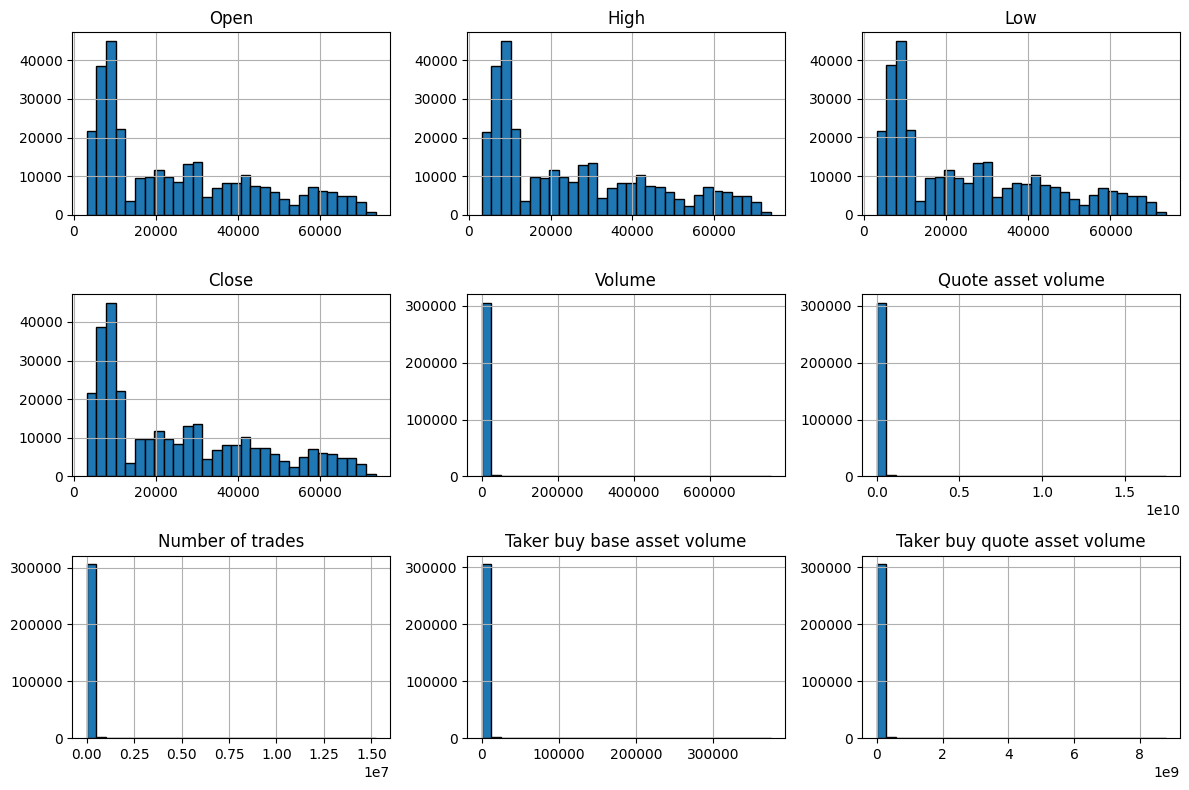

In [11]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')

plt.tight_layout()
plt.show()

### Korelačná analýza

<Axes: >

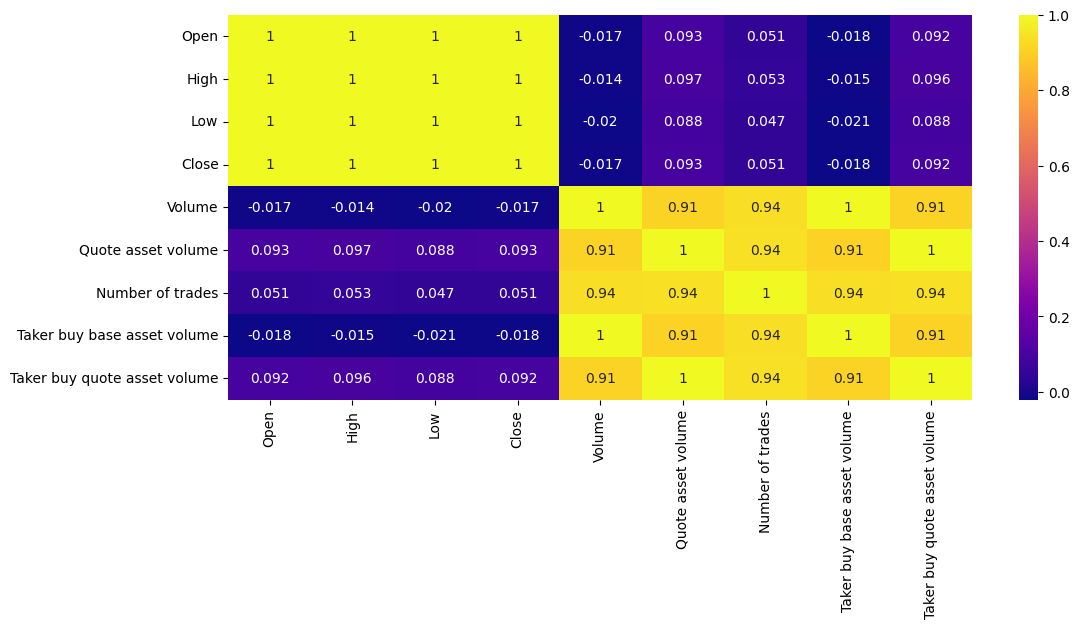

In [12]:
numerical_df = df.select_dtypes(include=['int', "float"])


correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')

### Top 10 najvyšších otváracích cien bitcoínov (2018-2024):

In [13]:
df.Open.nlargest(10).to_frame().style.background_gradient(cmap='Blues')

,Open
216753,73607.800000
216840,73577.350000
288222,73577.350000
216751,73574.420000
216838,73573.130000
216829,73553.740000
216846,73518.330000
216839,73512.590000
216750,73487.720000
216761,73459.650000


### 10 najnižších otváracích cien bitcoínov (2018 – 2024):

In [14]:
df.Open.nsmallest(10).to_frame().style.background_gradient(cmap='Reds')

,Open
33208,3166.110000
33209,3171.990000
33213,3172.000000
33210,3172.620000
242307,3172.620000
294536,3172.620000
33211,3173.530000
33207,3175.340000
33202,3175.990000
242305,3175.990000


### Top 10 najvyšších cien bitcoínov (2018 – 2024)

In [15]:
df.High.nlargest(10).to_frame().style.background_gradient(cmap='Blues')

,High
216840,73777.000000
288222,73777.000000
306024,73777.000000
309348,73777.000000
216828,73658.000000
288219,73658.000000
216749,73650.250000
288199,73650.250000
306019,73650.250000
309347,73650.250000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309519 entries, 0 to 309524
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open time                     309519 non-null  object 
 1   Open                          309519 non-null  float64
 2   High                          309519 non-null  float64
 3   Low                           309519 non-null  float64
 4   Close                         309519 non-null  float64
 5   Volume                        309519 non-null  float64
 6   Close time                    309519 non-null  object 
 7   Quote asset volume            309519 non-null  float64
 8   Number of trades              309519 non-null  int64  
 9   Taker buy base asset volume   309519 non-null  float64
 10  Taker buy quote asset volume  309519 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 36.4+ MB


## Týždenné najvyššie a najnižšie ceny Bitcoinu od roku 2018

In [17]:
df["Open time"]

0         2018-01-01 00:00:00
1         2018-01-01 00:15:00
2         2018-01-01 00:30:00
3         2018-01-01 00:45:00
4         2018-01-01 01:00:00
                 ...         
309520             2024-09-02
309521             2024-09-03
309522             2024-09-04
309523             2024-09-05
309524             2024-09-06
Name: Open time, Length: 309519, dtype: object

In [18]:
df["Open time"] = pd.to_datetime(df["Open time"], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [23]:
high_price_series = df.High

df.set_index("Open time", inplace=True)
df_monthly = df.resample('D').agg({
    'High': 'max',
    'Low': 'min'
})

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_monthly.index, y=df_monthly['High'], mode='lines', name='High', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_monthly.index, y=df_monthly['Low'], mode='lines', name='Low', line=dict(color='red')))

fig.update_layout(title='<b>Týždenné najvyššie a najnižšie ceny Bitcoinu od roku 2018',
                  xaxis_title='Dátum',
                  yaxis_title='Cena',
                  legend_title='Legend',
                  title_x = 0.5)

fig.show()
fig.write_html('highest_lowest_price_bit.html')


## Počet nakúpených Bitcoinov podľa jednotlivých hodín počas celého dňa 

In [20]:
df.reset_index(inplace=True)
df.insert(2, "hour", df["Open time"].dt.hour)
df.head(2)

,Open time,Open,hour,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2018-01-01 00:00:00,13715.65,0.00,13715.65,13400.01,13556.15,123.62,2018-01-01 00:14:59.999,1675544.89,1572,63.23,857610.83
1,2018-01-01 00:15:00,13533.75,0.00,13550.87,13402.00,13521.12,98.14,2018-01-01 00:29:59.999,1321756.85,1461,47.69,642281.17


In [21]:
hour_price_bitcoin = df.groupby("hour")["Number of trades"].count().reset_index().sort_values(by="Number of trades", ascending=False)

fig = go.Figure()

# Pridanie bodového grafu pre počet obchodov podľa hodiny
fig.add_trace(go.Scatter(x=hour_price_bitcoin['hour'],
                         y=hour_price_bitcoin['Number of trades'],
                         mode='markers',
                         marker=dict(color='blue'),
                         name='Počet obchodov'))

# Aktualizácia rozloženia grafu
fig.update_layout(title='Počet obchodov podľa hodín dňa',
                  xaxis_title='Hodina',
                  yaxis_title='Počet obchodov',
                  xaxis=dict(tickmode='linear'))

In [22]:
df.head()

,Open time,Open,hour,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2018-01-01 00:00:00,13715.65,0.00,13715.65,13400.01,13556.15,123.62,2018-01-01 00:14:59.999,1675544.89,1572,63.23,857610.83
1,2018-01-01 00:15:00,13533.75,0.00,13550.87,13402.00,13521.12,98.14,2018-01-01 00:29:59.999,1321756.85,1461,47.69,642281.17
2,2018-01-01 00:30:00,13500.00,0.00,13545.37,13450.00,13470.41,79.90,2018-01-01 00:44:59.999,1078825.29,1000,43.71,590034.71
3,2018-01-01 00:45:00,13494.65,0.00,13690.87,13450.00,13529.01,141.70,2018-01-01 00:59:59.999,1917782.81,1195,73.90,1000614.39
4,2018-01-01 01:00:00,13528.99,1.00,13571.74,13402.28,13445.63,72.54,2018-01-01 01:14:59.999,977819.79,898,34.26,461836.85
